In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
data = pd.read_csv("TASK-ML-INTERN.csv")

data.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [3]:
# Data Exploration
# Check for missing values
print("Missing values per column:")
data.isnull().sum()

Missing values per column:


hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 455 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.6+ MB


In [4]:
# Summary statistics
print("\nSummary statistics:")
data.describe()


Summary statistics:


,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,3410.006000
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,13095.803483
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,137.500000
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,500.000000
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,1700.000000
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000


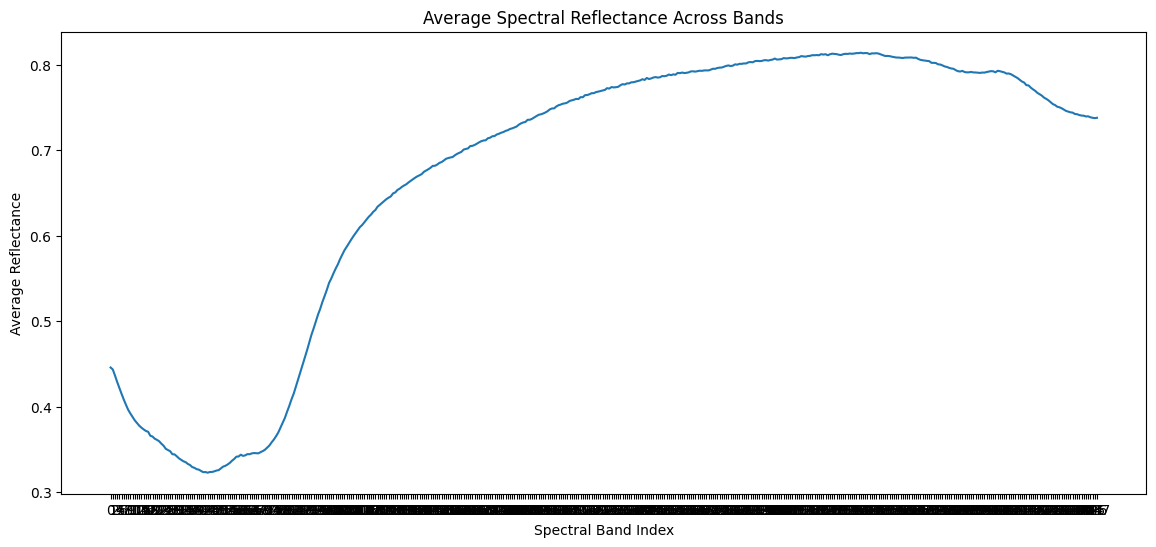

In [6]:
# Visualize spectral bands (average reflectance)
avg_reflectance = data.iloc[:, 1:-1].mean()
plt.figure(figsize=(14, 6))
plt.plot(avg_reflectance)
plt.title('Average Spectral Reflectance Across Bands')
plt.xlabel('Spectral Band Index')
plt.ylabel('Average Reflectance')
plt.show()


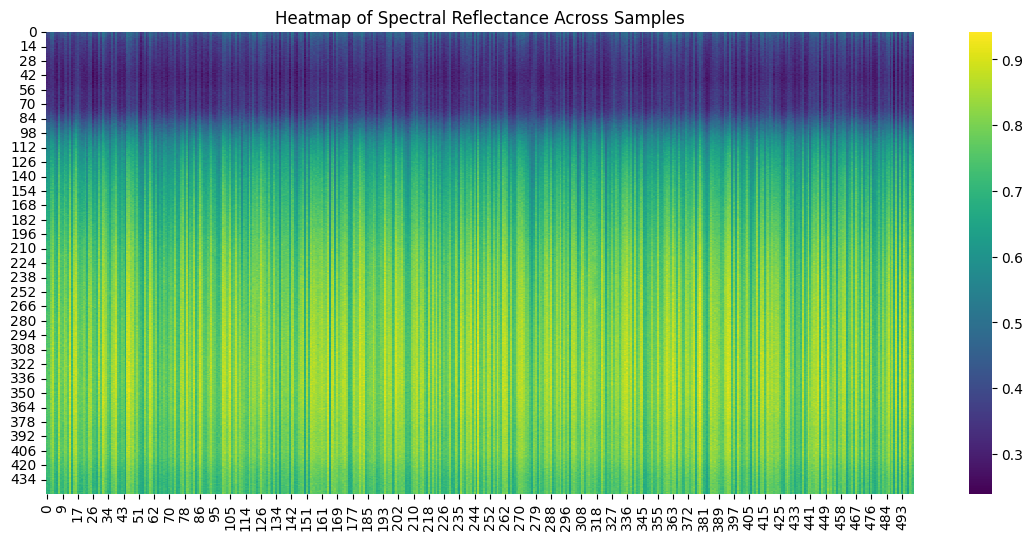

In [7]:
# Heatmap for sample comparisons
plt.figure(figsize=(14, 6))
sns.heatmap(data.iloc[:, 1:-1].transpose(), cmap='viridis')
plt.title('Heatmap of Spectral Reflectance Across Samples')
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler

# Split features and target
X = data.iloc[:, 1:-1]  # Spectral data
y = data['vomitoxin_ppb']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Number of components in PCA: 2


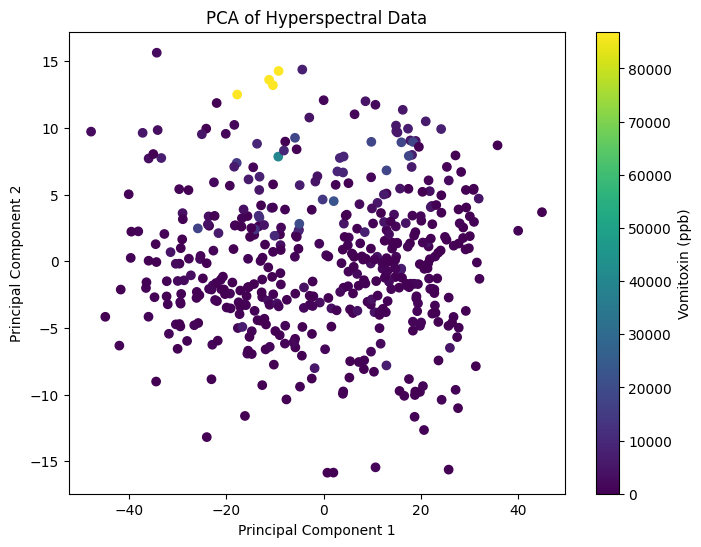

    Best Model: RandomForestRegressor(max_depth=10, min_samples_leaf=4, random_state=42)
   MAE: 3313.15
   RMSE: 9164.09
   R2 Score: 0.51
Number of components in PCA: 10


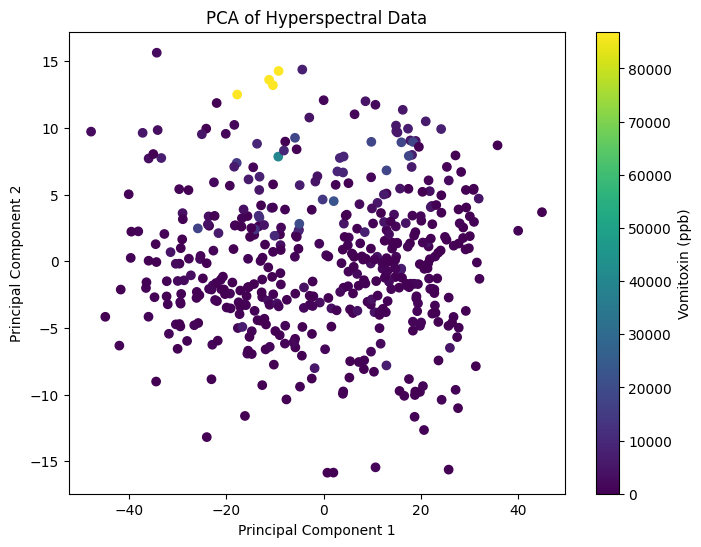

    Best Model: RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=10,
                      random_state=42)
   MAE: 2687.29
   RMSE: 7162.82
   R2 Score: 0.70
Number of components in PCA: 20


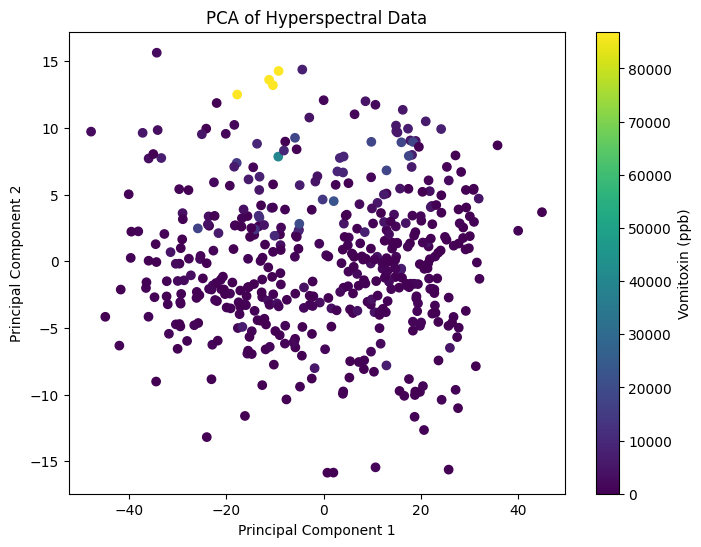

    Best Model: RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=10,
                      random_state=42)
   MAE: 2735.31
   RMSE: 7188.86
   R2 Score: 0.70
Number of components in PCA: 25


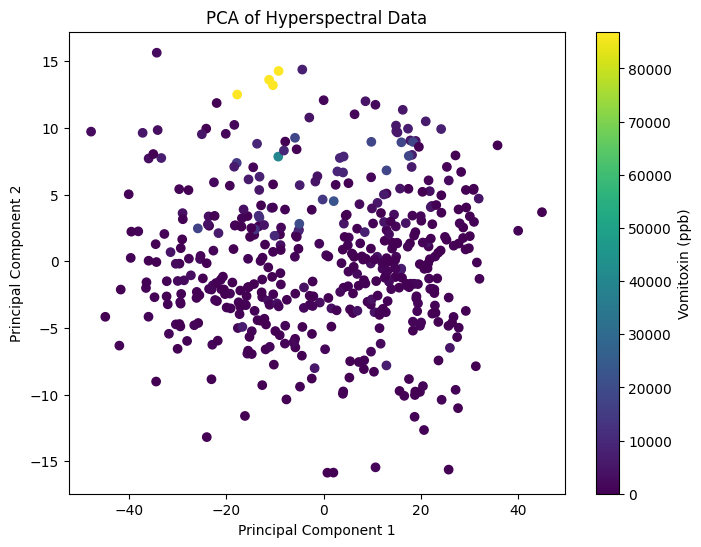

    Best Model: RandomForestRegressor(max_depth=30, min_samples_leaf=2, random_state=42)
   MAE: 2682.86
   RMSE: 7136.28
   R2 Score: 0.70
Number of components in PCA: 30


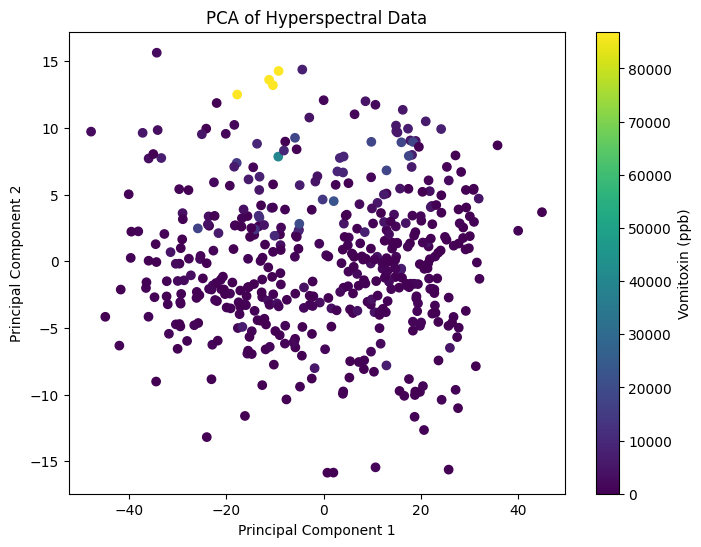

    Best Model: RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=10,
                      random_state=42)
   MAE: 2799.20
   RMSE: 7294.73
   R2 Score: 0.69
Number of components in PCA: 40


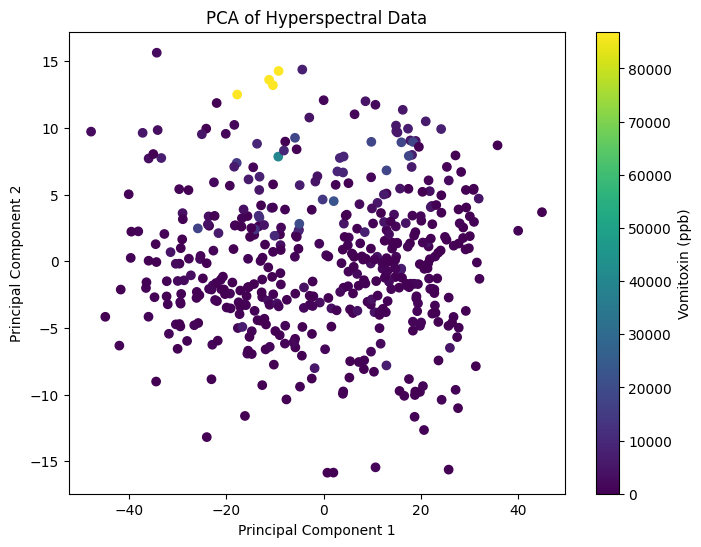

    Best Model: RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                      random_state=42)
   MAE: 2834.87
   RMSE: 7282.84
   R2 Score: 0.69
Number of components in PCA: 50


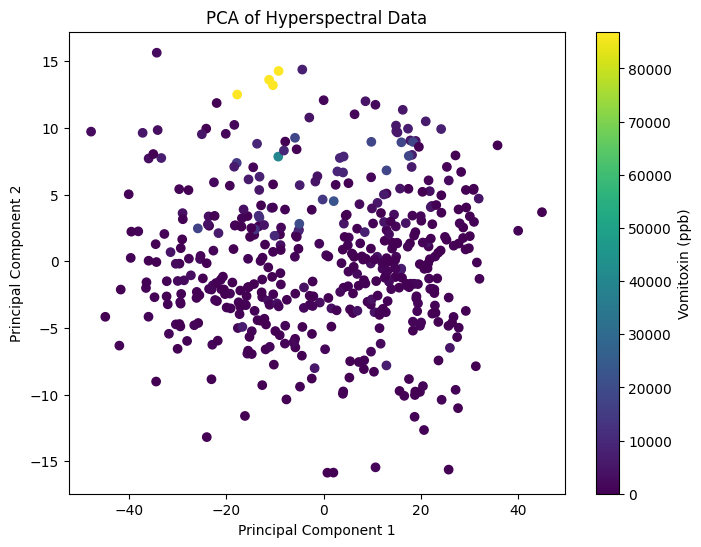

    Best Model: RandomForestRegressor(max_depth=30, random_state=42)
   MAE: 2685.54
   RMSE: 6706.52
   R2 Score: 0.74
Number of components in PCA: 100


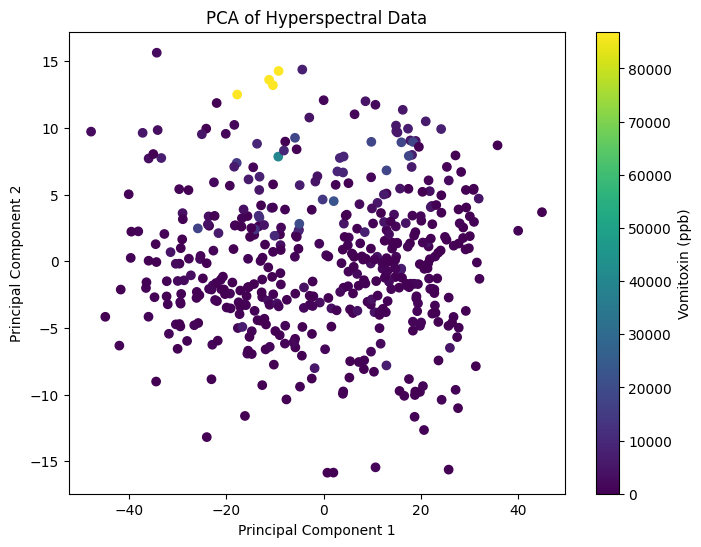

    Best Model: RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=10,
                      random_state=42)
   MAE: 3009.33
   RMSE: 7479.75
   R2 Score: 0.67


In [9]:
number_of_components = [2, 10, 20, 25, 30, 40, 50, 100]
for nc in number_of_components:
    print("Number of components in PCA:", nc)
    # Dimensionality Reduction using PCA
    pca = PCA(n_components=nc)
    X_pca = pca.fit_transform(X_scaled)
    
    # Visualize the first two principal components
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
    plt.colorbar(label='Vomitoxin (ppb)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA of Hyperspectral Data')
    plt.show()
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
    
    
    # Hyperparameter tuning using GridSearchCV
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    rf = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get the best model
    best_model = grid_search.best_estimator_
    print("    Best Model:", best_model)
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f'   MAE: {mae:.2f}')
    print(f'   RMSE: {rmse:.2f}')
    print(f'   R2 Score: {r2:.2f}')

Epoch 1/300


C:\Users\avina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - loss: 2293.1938 - val_loss: 3830.9343 - learning_rate: 0.0010
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - loss: 2297.1189 - val_loss: 3829.1978 - learning_rate: 0.0010
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - loss: 2176.8955 - val_loss: 3828.0676 - learning_rate: 0.0010
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - loss: 2057.8091 - val_loss: 3827.1814 - learning_rate: 0.0010
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - loss: 2111.0527 - val_loss: 3826.3296 - learning_rate: 0.0010
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - loss: 2270.6323 - val_loss: 3825.5032 - learning_rate: 0.0010
Epoch 7/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - loss: 2274.1331 - val_loss: 3824.6924 - learning_rate: 0.0010
Epoch 8/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - loss: 2505.7358 - val_loss: 3823.9141 - learning_rate: 0.0010
Epoch 9/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - loss: 1891.0602 - val_loss: 3823.1199 - learning_rate: 0.

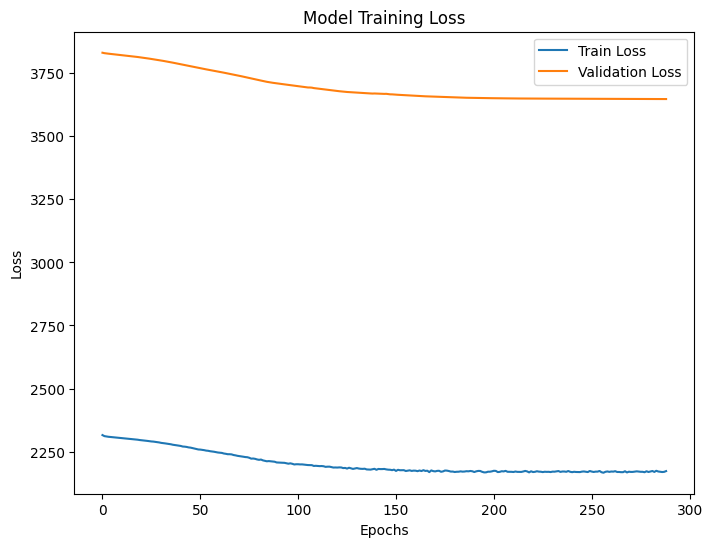

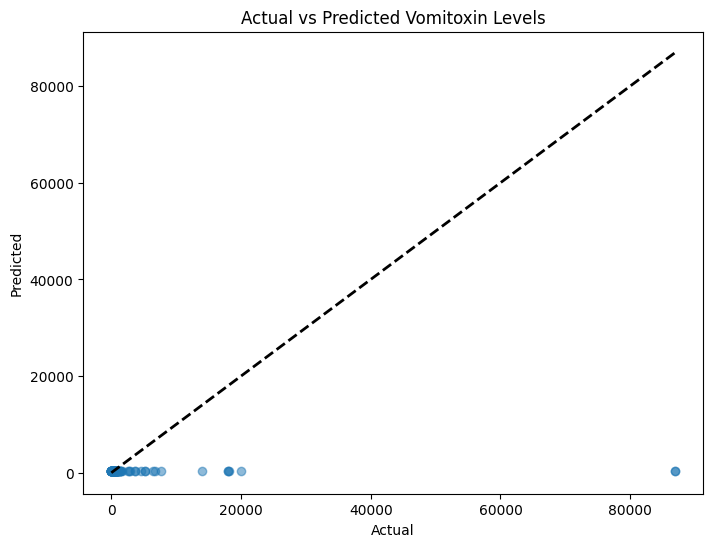

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional, LayerNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


# pca = PCA(n_components=50)
# X_pca = pca.fit_transform(X_scaled)

# # Visualize the first two principal components
# plt.figure(figsize=(8, 6))
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
# plt.colorbar(label='Vomitoxin (ppb)')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA of Hyperspectral Data')
# plt.show()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the advanced LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(256, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(LayerNormalization())
model.add(Dropout(0.4))

model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(LayerNormalization())
model.add(Dropout(0.4))

model.add(Bidirectional(LSTM(64)))
model.add(LayerNormalization())
model.add(Dropout(0.4))

model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mae')

# Callbacks to prevent overfitting
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=300,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[reduce_lr, early_stopping],
    verbose=1
)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2 Score: {r2:.2f}')

# Plot training history
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Loss')
plt.legend()
plt.show()

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Vomitoxin Levels')
plt.show()


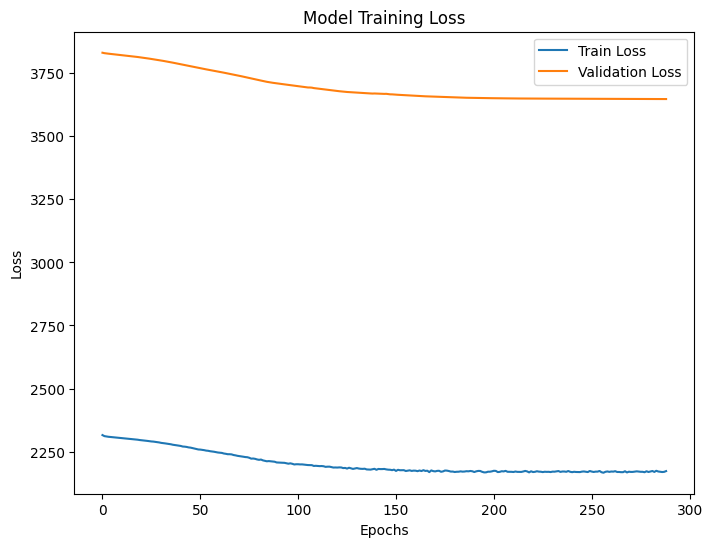

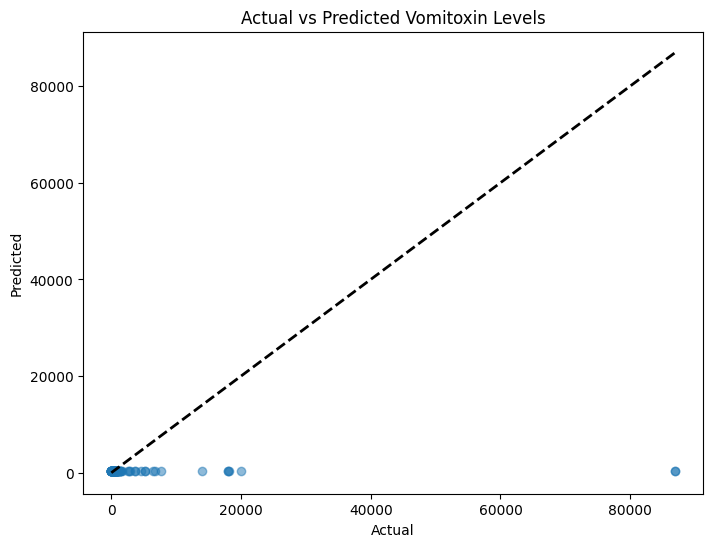